In [0]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 22.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'. format(
    name = fn, length = len(uploaded[fn])))

Saving wine2.csv to wine2.csv
User uploaded file "wine2.csv" with length 9762 bytes


In [0]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['wine2.csv'].decode('utf-8')))

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv("wine2.csv")

In [0]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 전체 dataset에서 Test, Dev set으로 Stratified Resampling

In [0]:
X = df.drop("Wine", 1)
y = df["Wine"]

In [0]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [0]:
from collections import Counter

np.array(list(Counter(y_dev).values())) / len(y_dev)

array([0.38842975, 0.14049587, 0.47107438])

In [0]:
np.array(list(Counter(y_test).values())) / len(y_test)

array([0.38709677, 0.16129032, 0.4516129 ])

# OverSampling - Random

In [0]:
from imblearn.over_sampling import RandomOverSampler

Counter(y_dev)

Counter({1: 47, 2: 57, 3: 17})

In [0]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_dev, y_dev)  #OverSampling

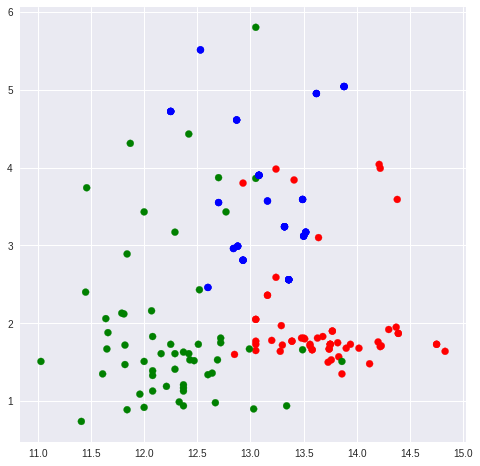

In [0]:
from matplotlib import pyplot as plt
import matplotlib

colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

## 1. Decision Tree

Oversampling 전 성능 측정

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_dev, y_dev)
y_pred = dt.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accurancy : 0.8709677419354839
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.92      0.79      0.85        14
           3       1.00      0.80      0.89         5

   micro avg       0.87      0.87      0.87        31
   macro avg       0.91      0.86      0.87        31
weighted avg       0.88      0.87      0.87        31



Oversampling 후 성능 측정

In [0]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_resampled, y_resampled)
y_pred = dt.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred))  #성능 상승!
print(classification_report(y_test, y_pred))

Accurancy : 0.967741935483871
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.97      0.98      0.97        31
weighted avg       0.97      0.97      0.97        31



## 2. RandomForest

Oversampling 전 성능 측정

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features=2, n_jobs=-1, oob_score=True)
rf.fit(X_dev, y_dev)
y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accurancy : 0.9354838709677419
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.88      1.00      0.93        14
           3       1.00      0.60      0.75         5

   micro avg       0.94      0.94      0.94        31
   macro avg       0.96      0.87      0.89        31
weighted avg       0.94      0.94      0.93        31



Oversampling 후 성능 측정

In [0]:
rf = RandomForestClassifier(n_estimators=100, max_features=2, n_jobs=-1, oob_score=True)
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred))  #성능 상승!
print(classification_report(y_test, y_pred))

Accurancy : 0.967741935483871
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.80      0.89         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.98      0.93      0.95        31
weighted avg       0.97      0.97      0.97        31



## 3. LightGBM

Oversampling 전 성능 측정

In [0]:
import lightgbm as lgb

LGBM = lgb.LGBMClassifier(num_leaves=2)
LGBM.fit(X_dev, y_dev)
y_pred = LGBM.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accurancy : 0.9354838709677419
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.93      0.93      0.93        14
           3       1.00      0.80      0.89         5

   micro avg       0.94      0.94      0.94        31
   macro avg       0.95      0.91      0.93        31
weighted avg       0.94      0.94      0.93        31



Oversampling 후 성능 측정

In [0]:
LGBM = lgb.LGBMClassifier(num_leaves=2)
LGBM.fit(X_resampled, y_resampled)
y_pred = LGBM.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred)) #성능 상승!
print(classification_report(y_test, y_pred))

Accurancy : 0.967741935483871
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.97      0.98      0.97        31
weighted avg       0.97      0.97      0.97        31



# OverSampling - SMOTE

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
smothe = SMOTE()
X_resampled, y_resampled = smothe.fit_sample(X_dev, y_dev)

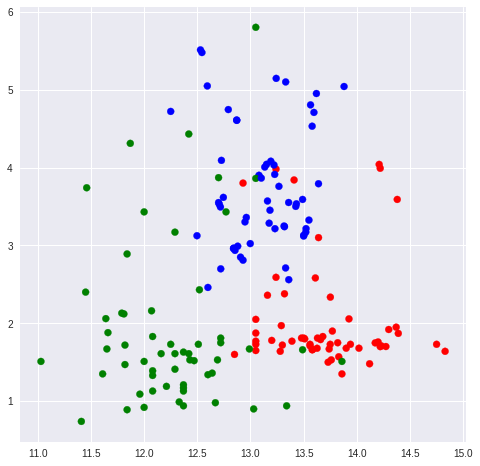

In [0]:
colors = ['red', 'green', 'blue']

fig = plt.figure(figsize = (8,8))
plt.scatter(X_resampled[:,0],  X_resampled[:,1], c =y_resampled,
           cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

## 1. SVM

Oversampling 전 성능 측정

In [0]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=1.0, random_state=1)
svm.fit(X_dev, y_dev)
y_pred = svm.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accurancy : 0.8387096774193549
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        12
           2       0.86      0.86      0.86        14
           3       1.00      0.40      0.57         5

   micro avg       0.84      0.84      0.84        31
   macro avg       0.89      0.75      0.77        31
weighted avg       0.86      0.84      0.82        31



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Oversampling 후 성능 측정

In [0]:
svm = LinearSVC(C=1.0, random_state=1)
svm.fit(X_resampled, y_resampled)
y_pred = svm.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred)) #성능 떨어짐
print(classification_report(y_test, y_pred))

Accurancy : 0.7741935483870968
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        12
           2       1.00      0.57      0.73        14
           3       0.67      0.80      0.73         5

   micro avg       0.77      0.77      0.77        31
   macro avg       0.79      0.79      0.76        31
weighted avg       0.83      0.77      0.77        31



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## 2. Naive Bayes

Oversampling 전 성능 측정

In [0]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_dev, y_dev)
y_pred = nb.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accurancy : 0.967741935483871
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.97      0.98      0.97        31
weighted avg       0.97      0.97      0.97        31



Oversampling 후 성능 측정

In [0]:
nb = GaussianNB()
nb.fit(X_resampled, y_resampled)
y_pred = nb.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred)) #성능 동일
print(classification_report(y_test, y_pred))

Accurancy : 0.967741935483871
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         5

   micro avg       0.97      0.97      0.97        31
   macro avg       0.97      0.98      0.97        31
weighted avg       0.97      0.97      0.97        31



## 3. AdaBoost

Oversampling 전 성능 측정

In [0]:
from sklearn.ensemble import AdaBoostClassifier

Ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500, learning_rate=0.1)
Ada.fit(X_dev, y_dev)
y_pred = Ada.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accurancy : 0.9032258064516129
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.87      0.93      0.90        14
           3       1.00      0.60      0.75         5

   micro avg       0.90      0.90      0.90        31
   macro avg       0.93      0.84      0.87        31
weighted avg       0.91      0.90      0.90        31



Oversampling 후 성능 측정

In [0]:
Ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500, learning_rate=0.1)
Ada.fit(X_resampled, y_resampled)
y_pred = Ada.predict(X_test)

print("Accurancy :", accuracy_score(y_test, y_pred))  #성능 동일 
print(classification_report(y_test, y_pred))

Accurancy : 0.9032258064516129
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.87      0.93      0.90        14
           3       1.00      0.60      0.75         5

   micro avg       0.90      0.90      0.90        31
   macro avg       0.93      0.84      0.87        31
weighted avg       0.91      0.90      0.90        31

